In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Set the figure size
plt.rcParams["figure.figsize"] = [15.50, 4.50]
plt.rcParams["figure.autolayout"] = True

/Users/dtfernando/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


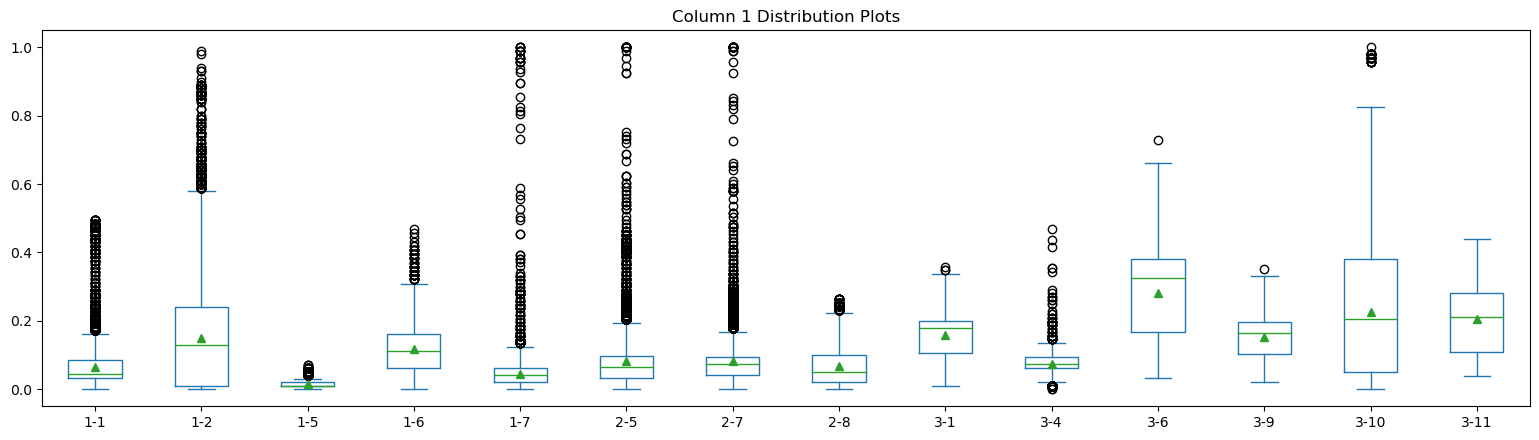

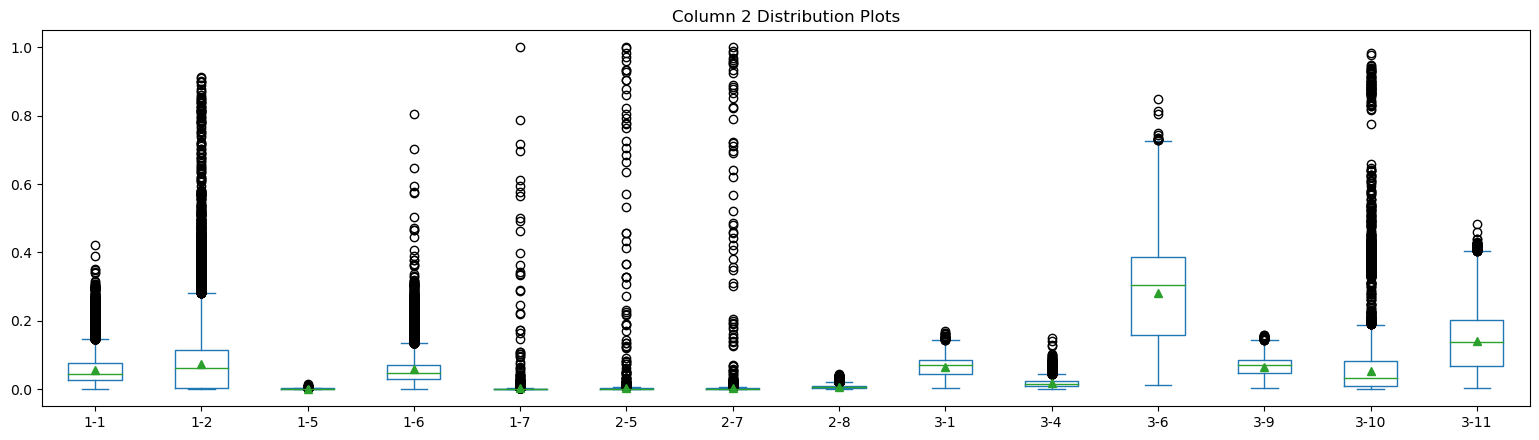

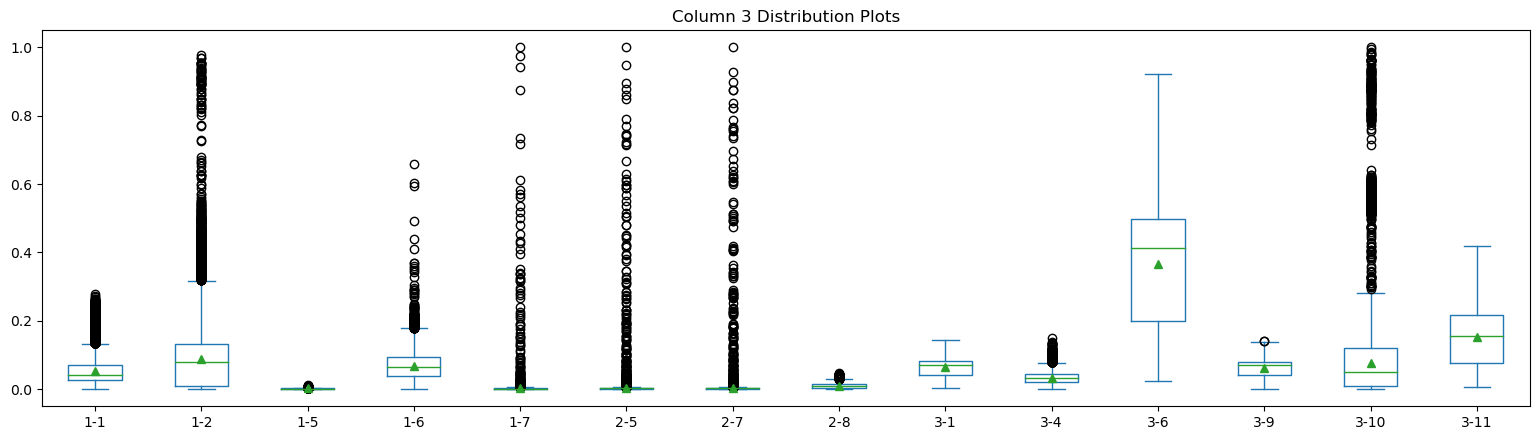

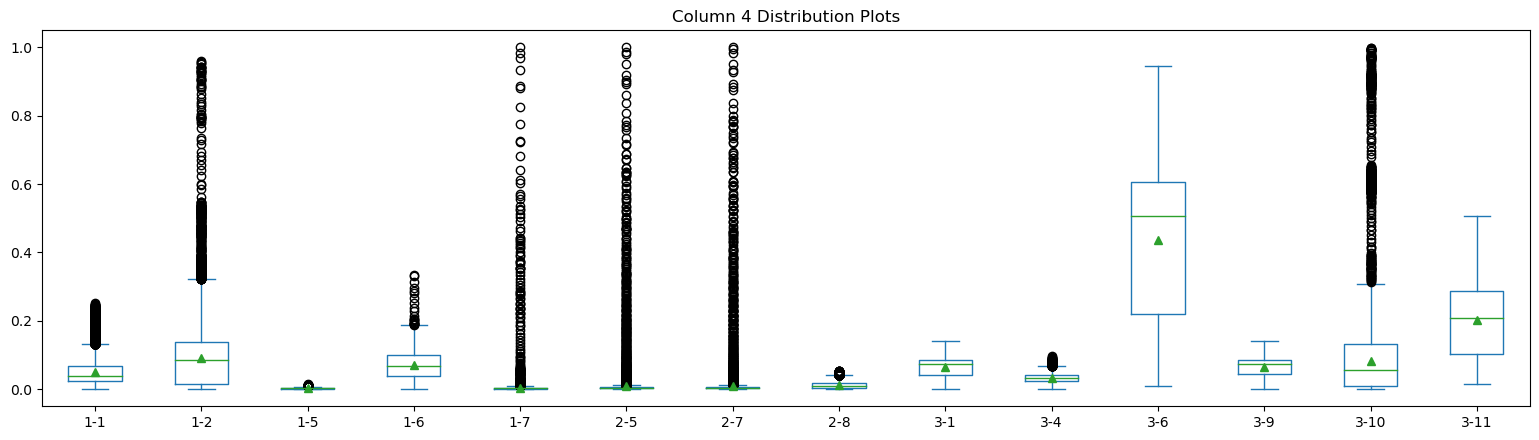

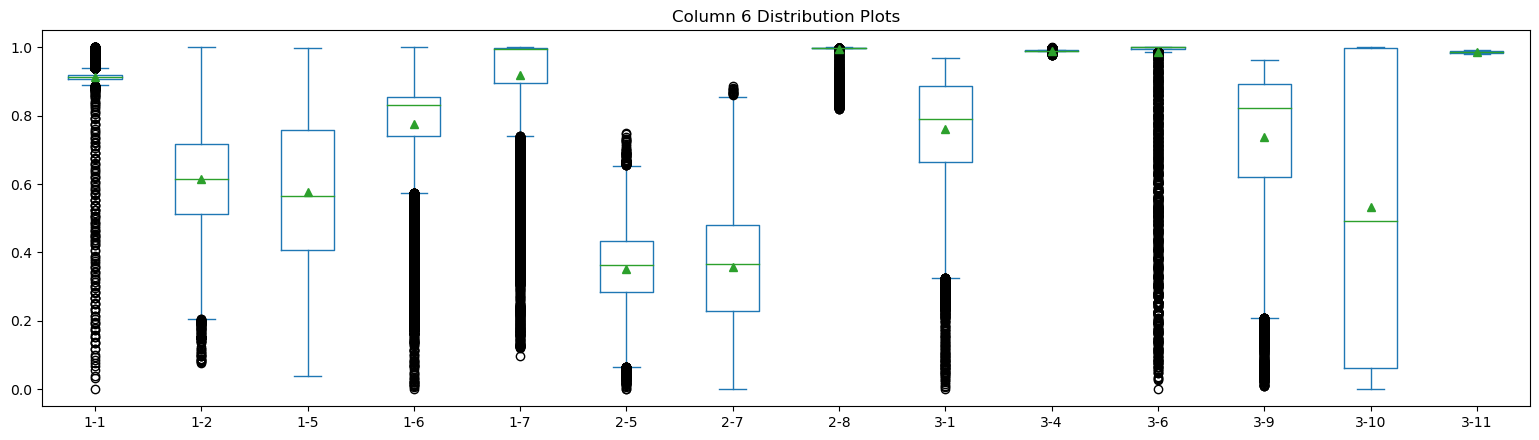

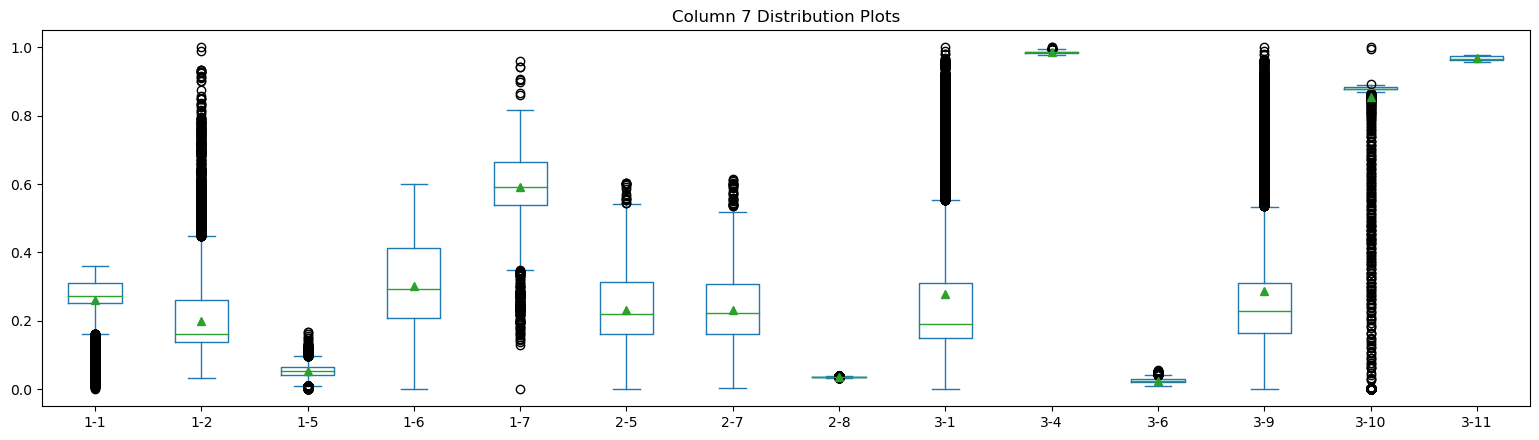

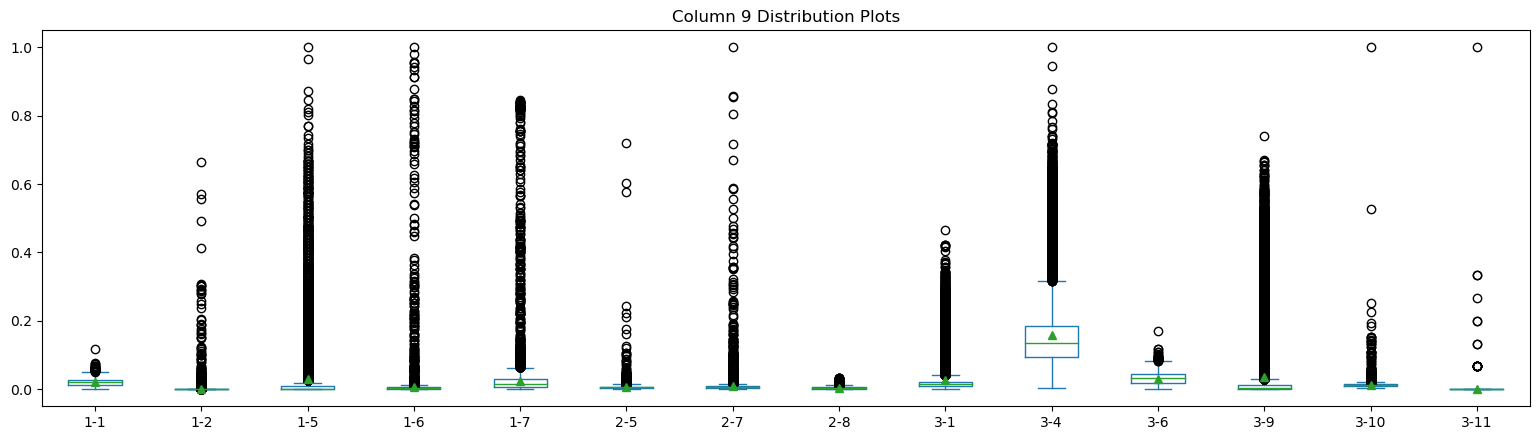

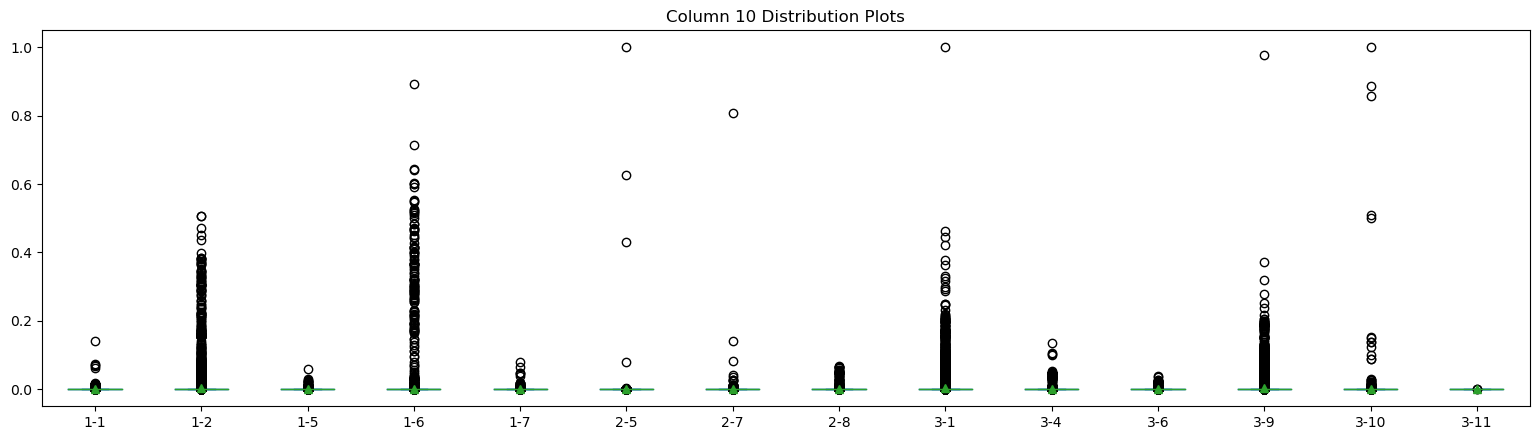

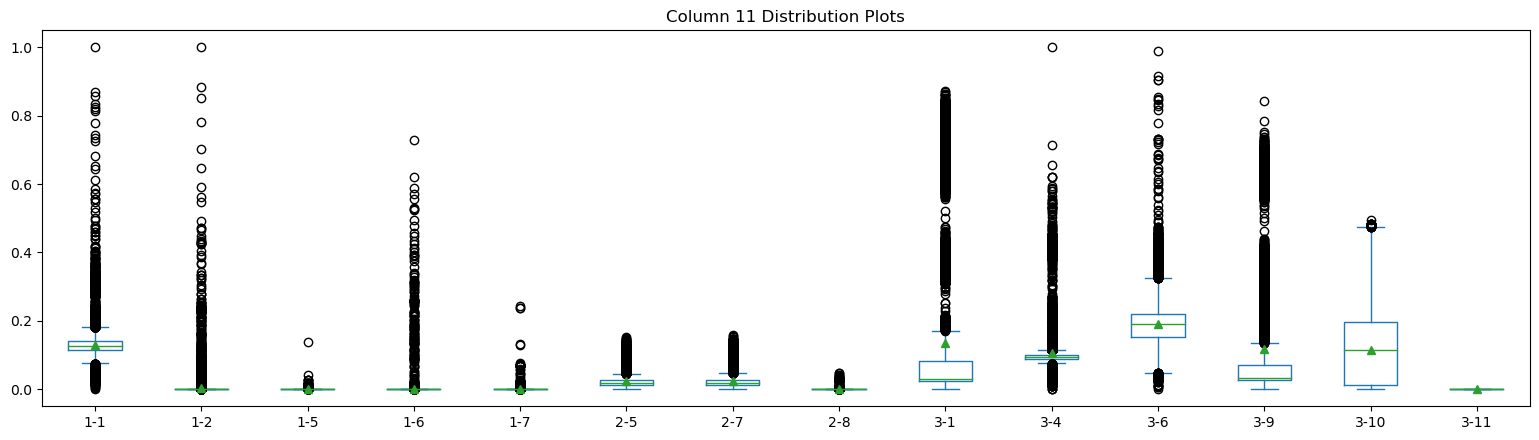

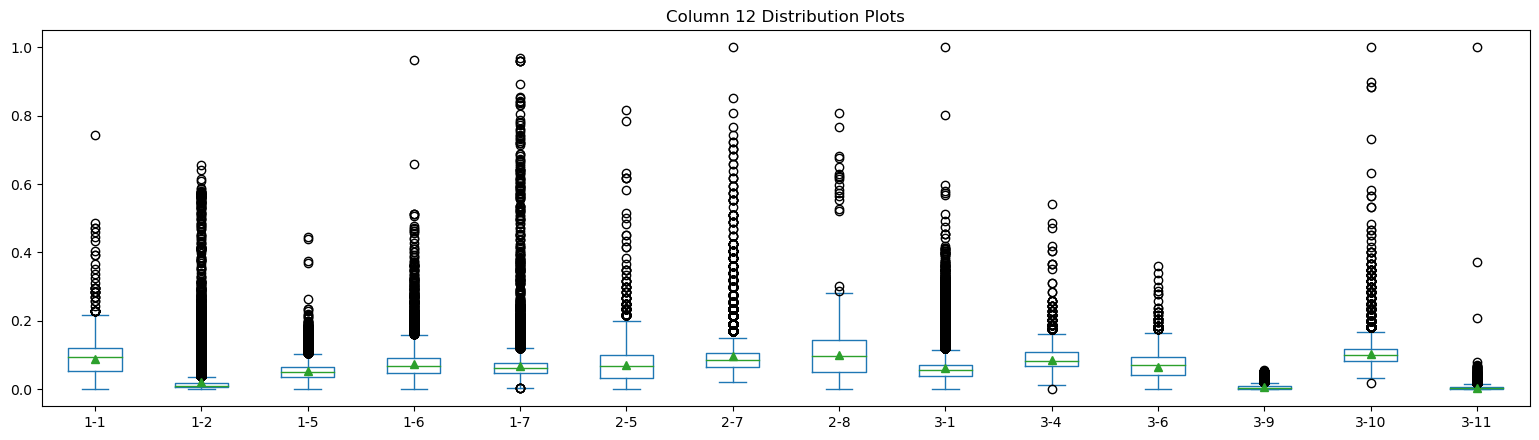

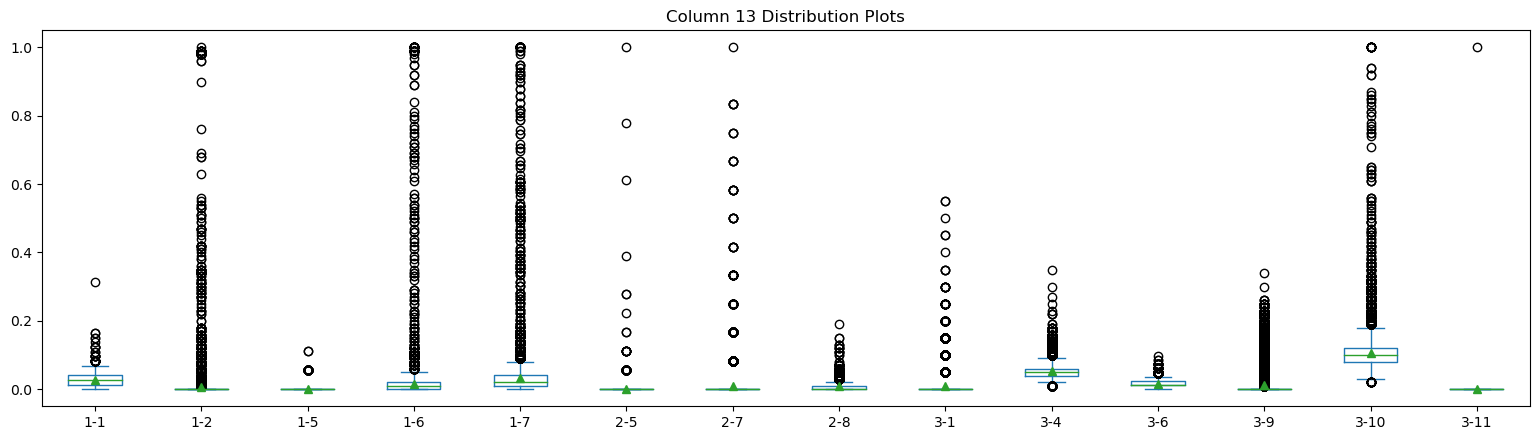

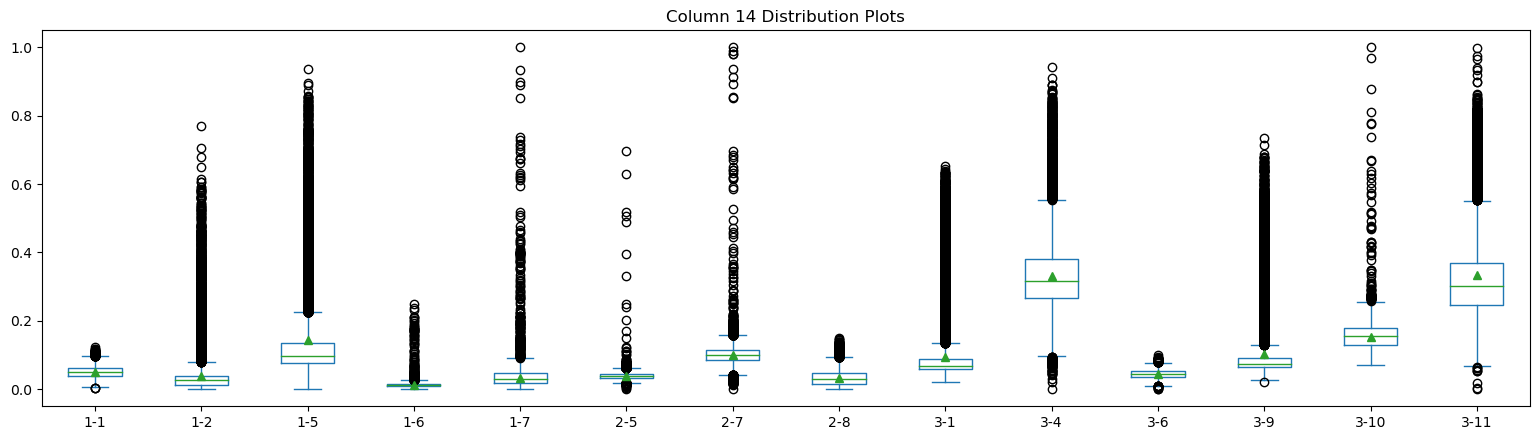

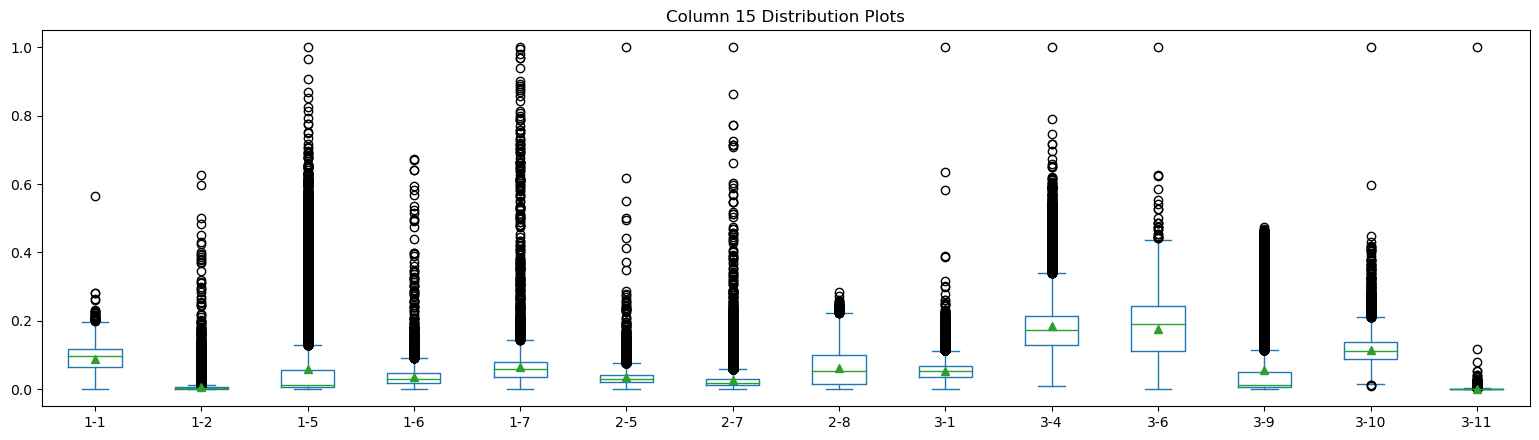

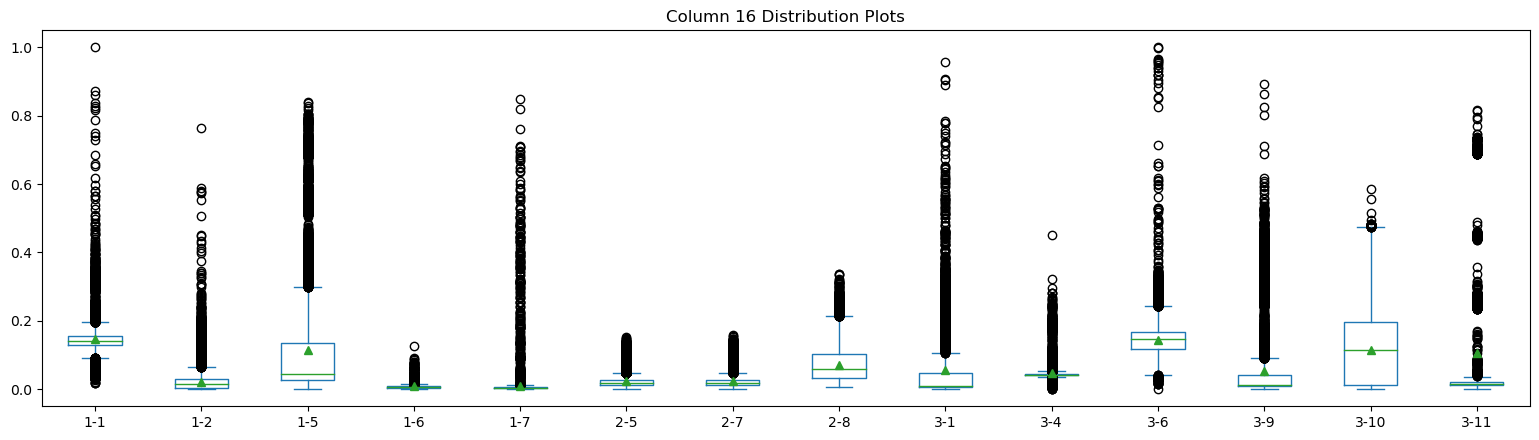

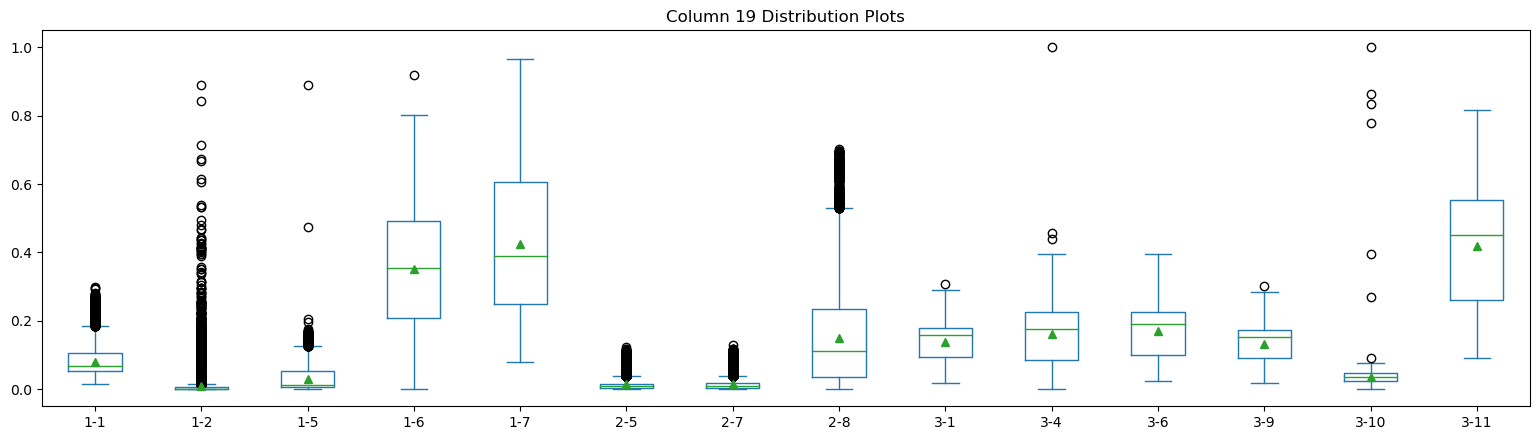

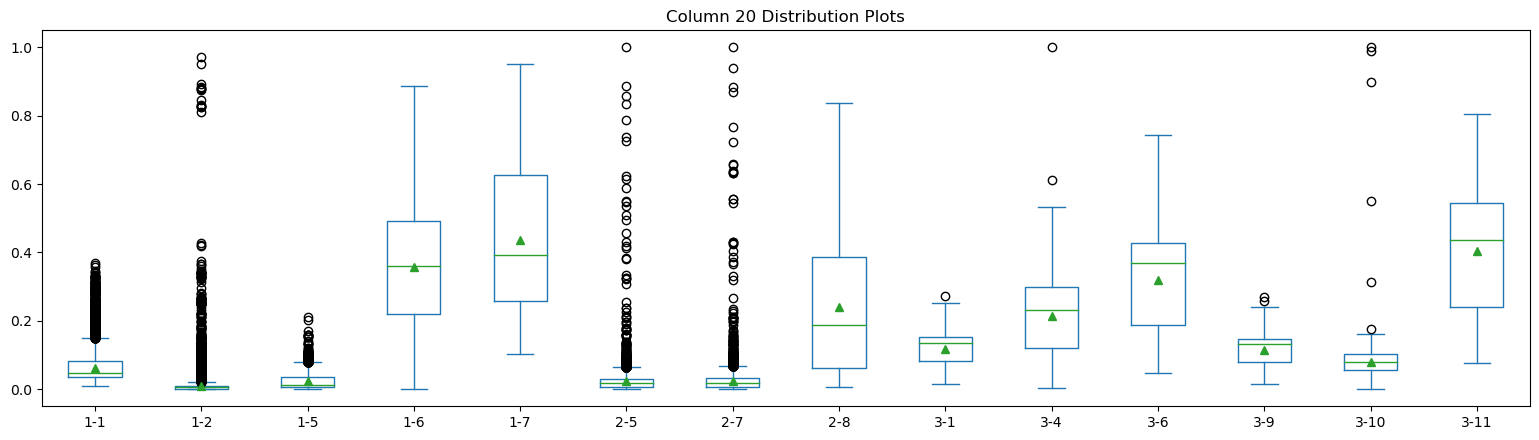

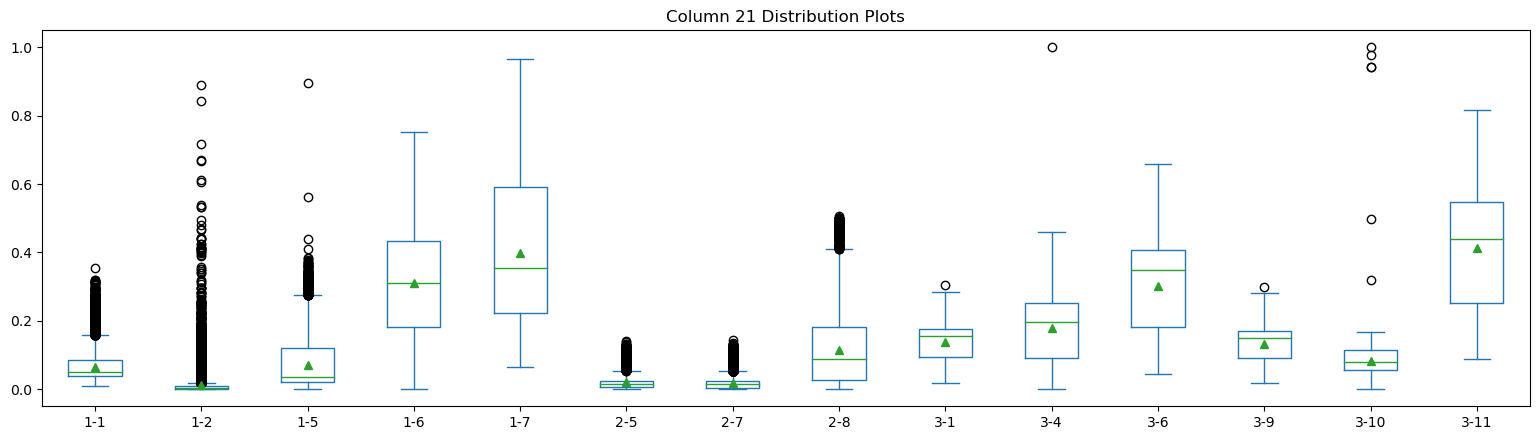

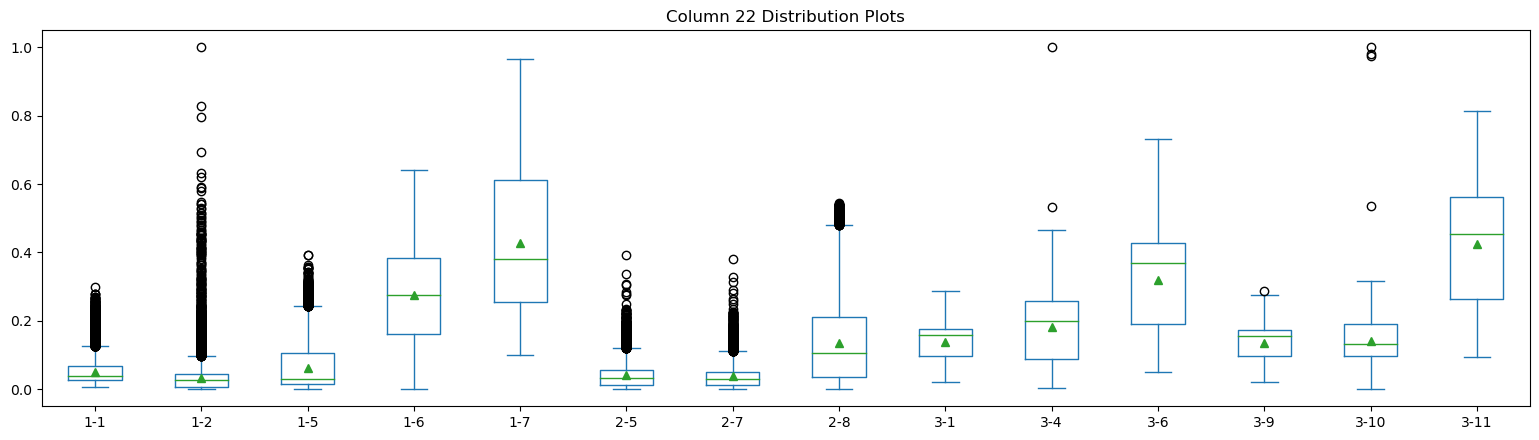

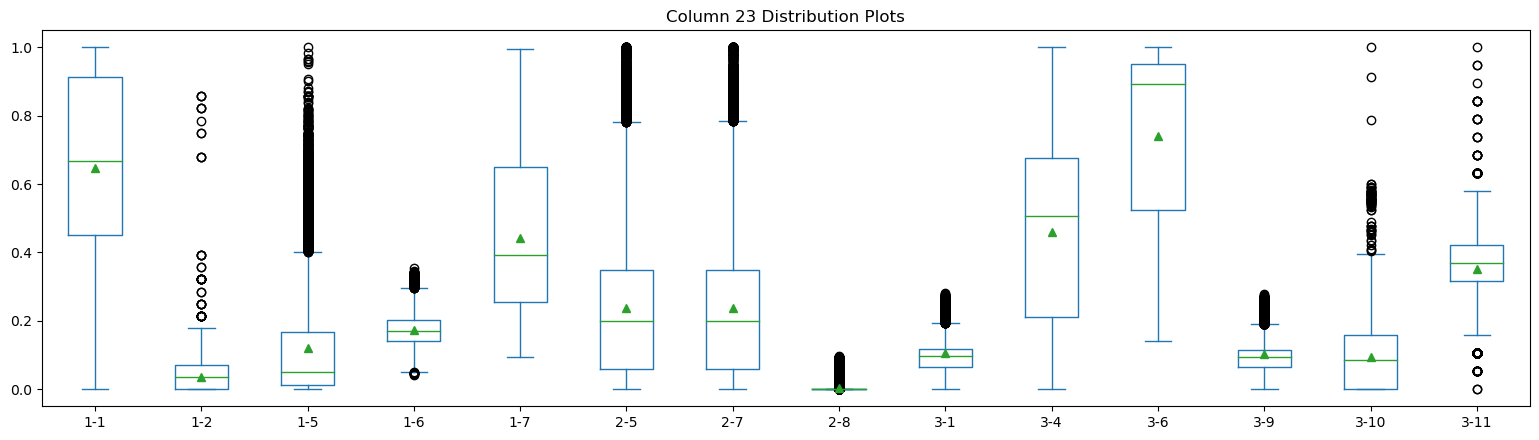

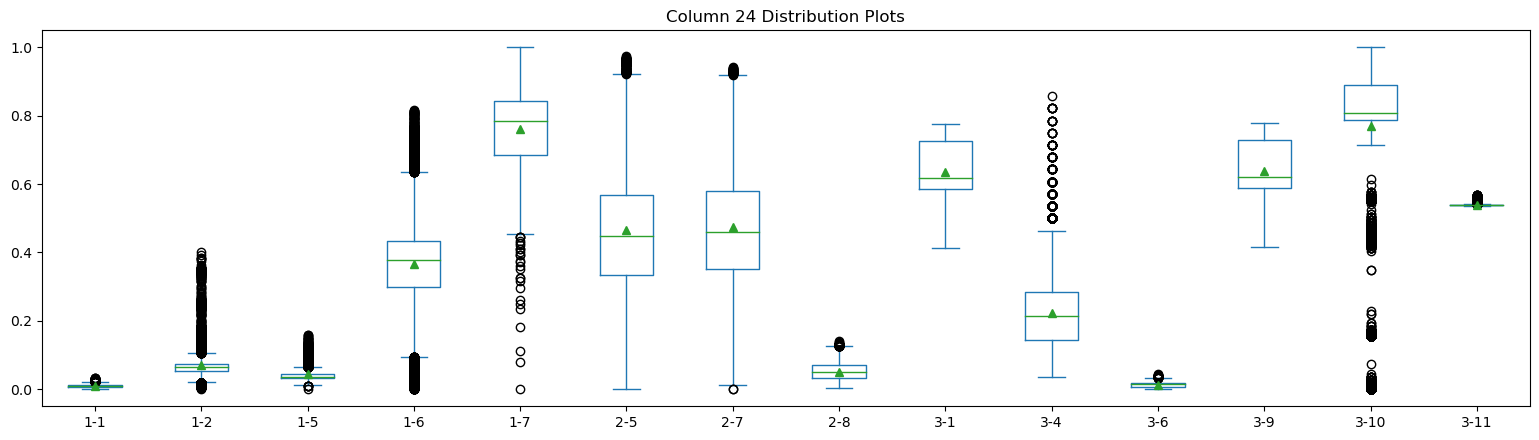

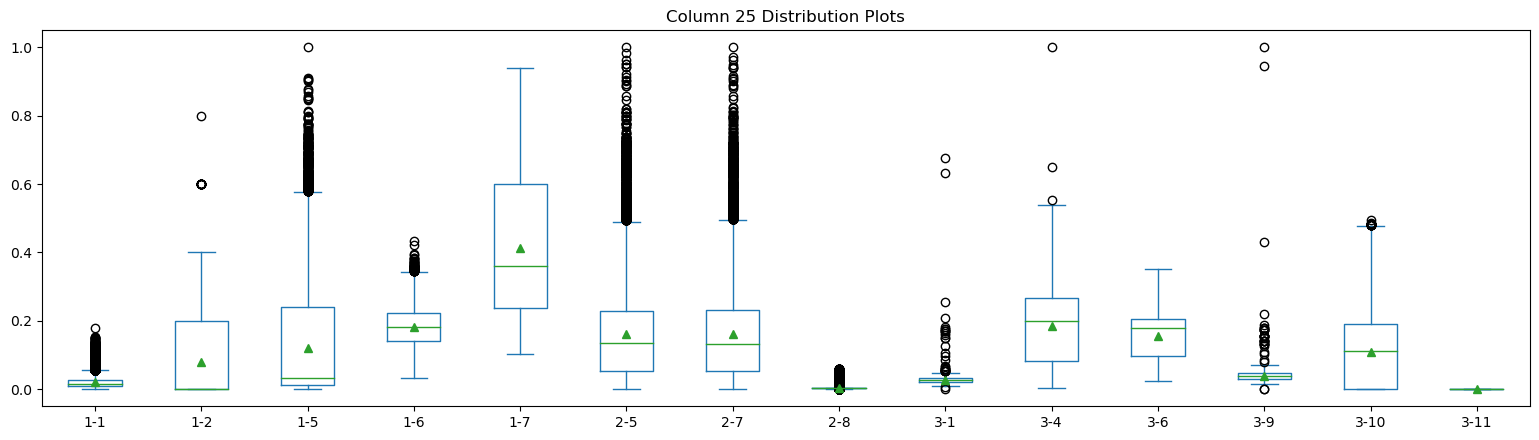

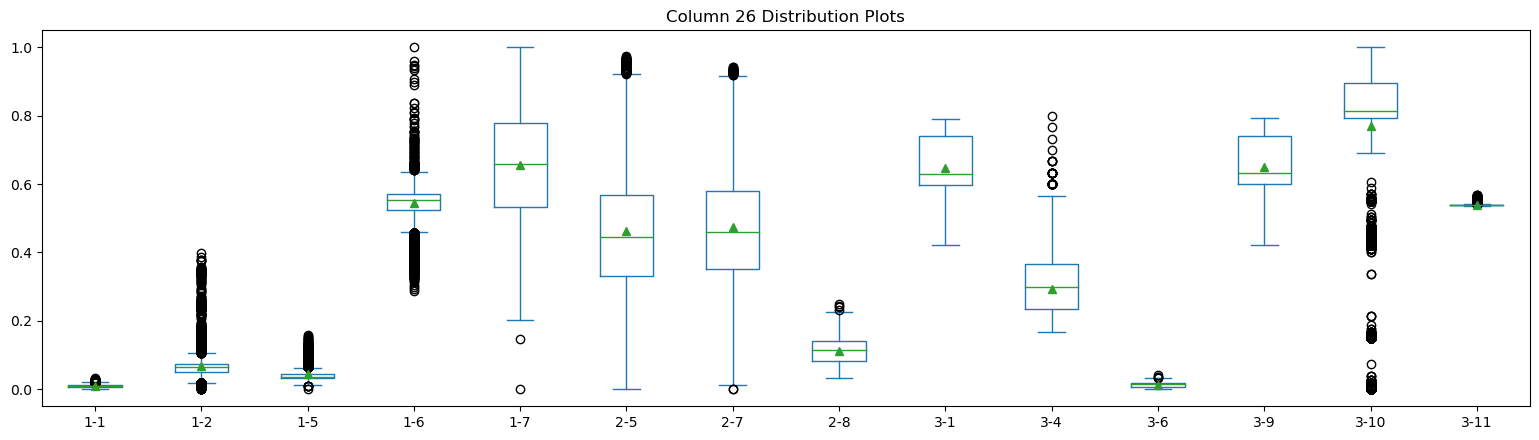

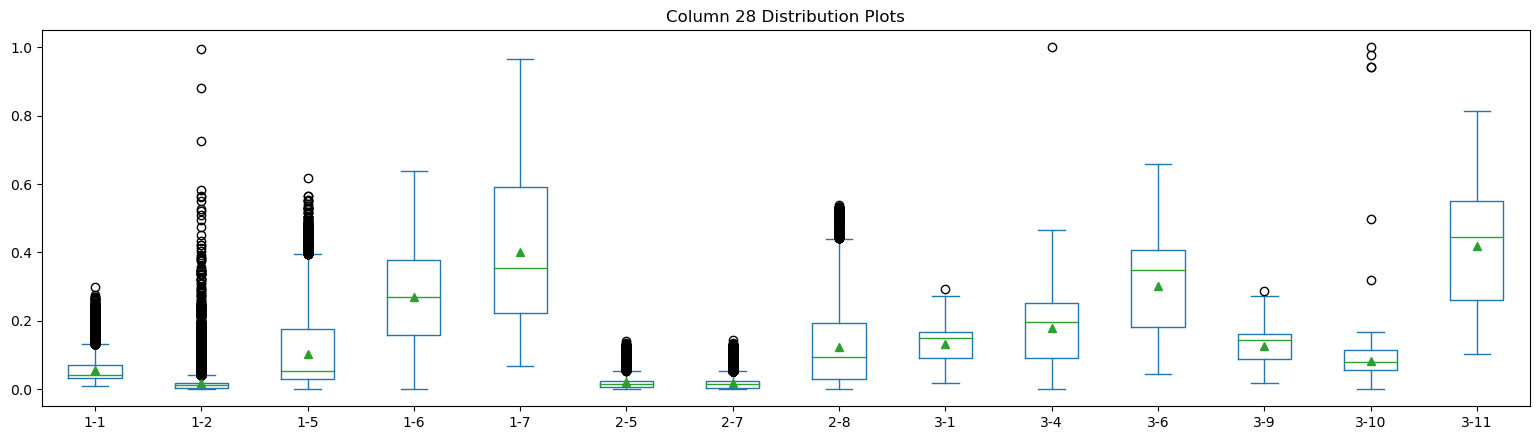

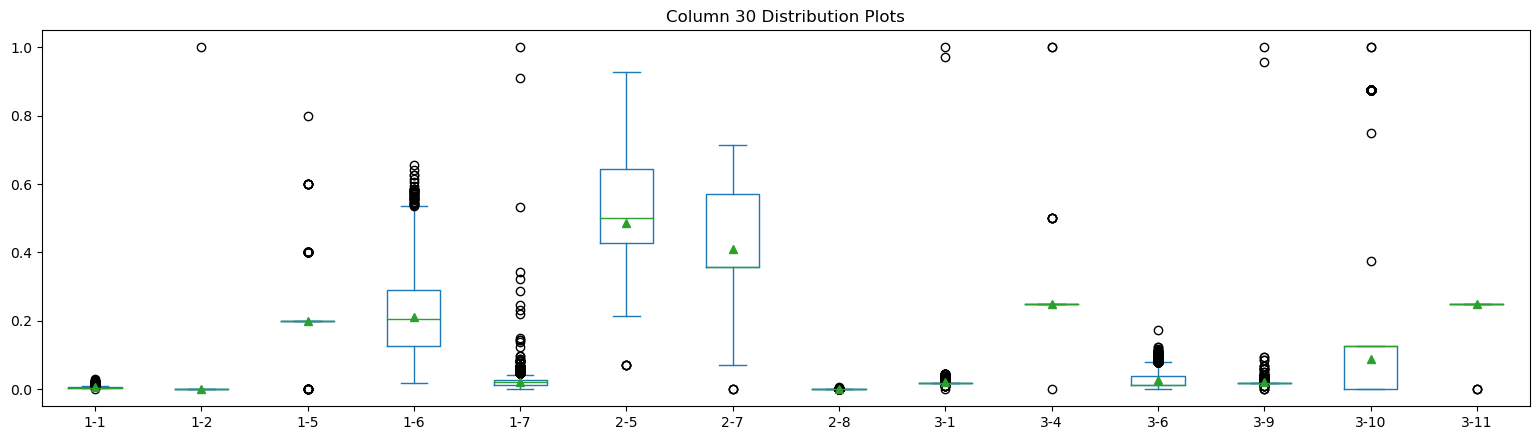

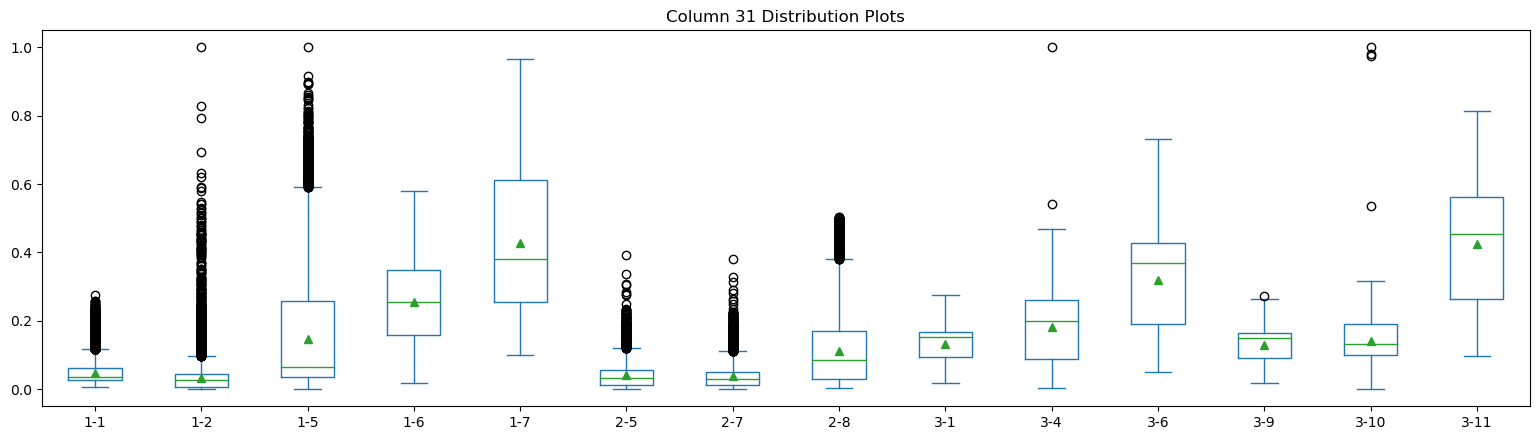

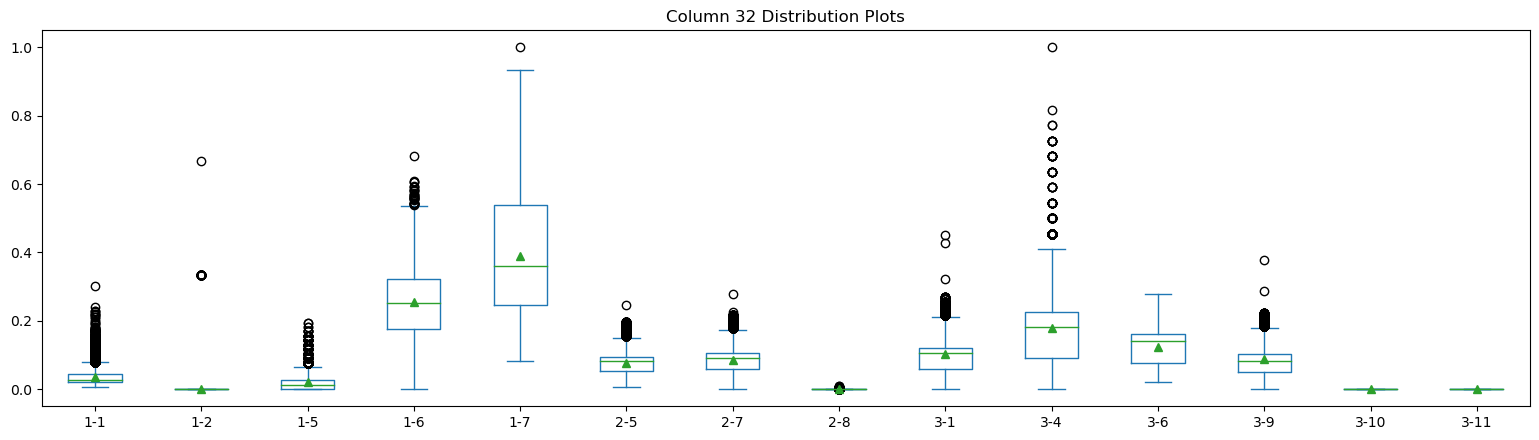

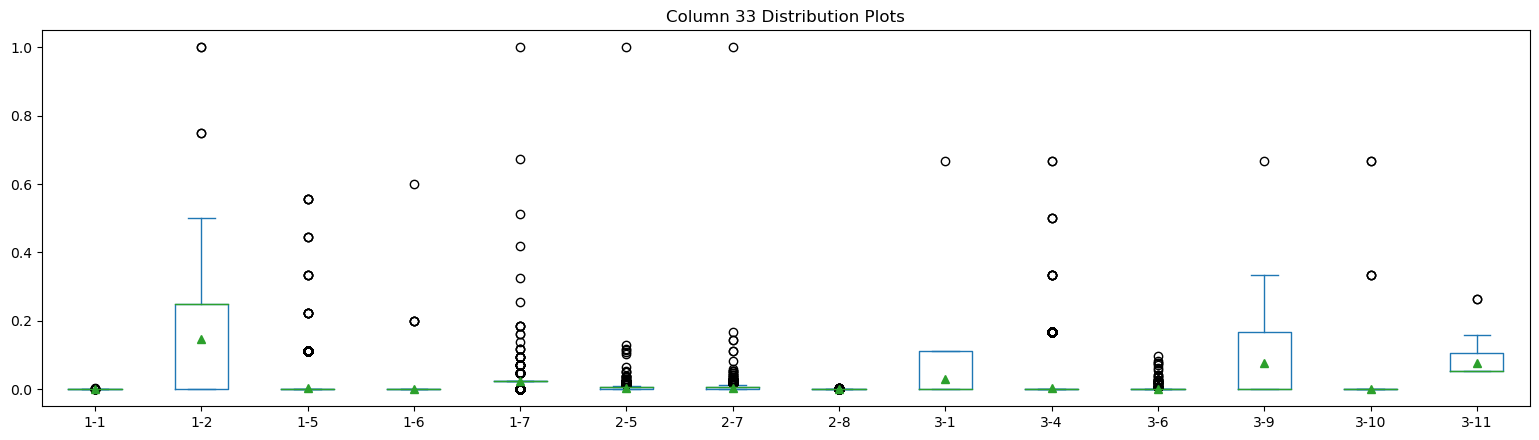

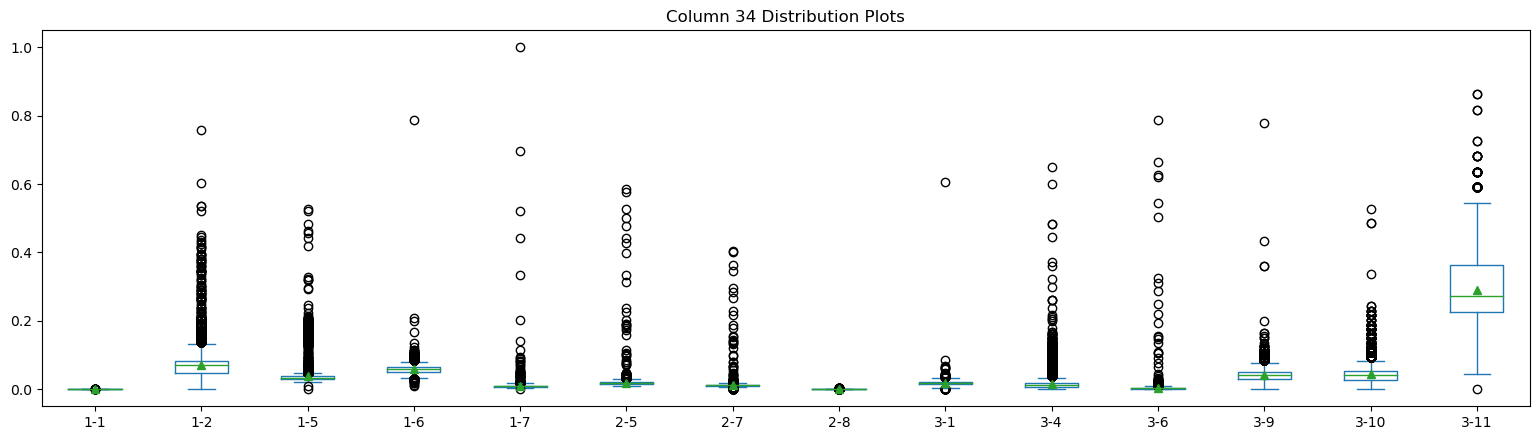

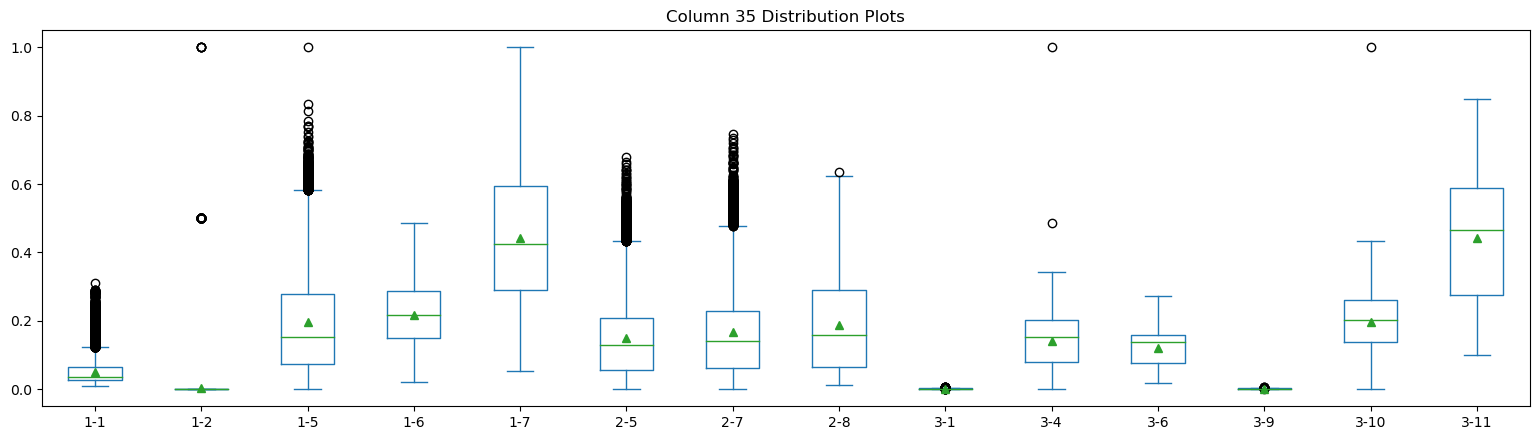

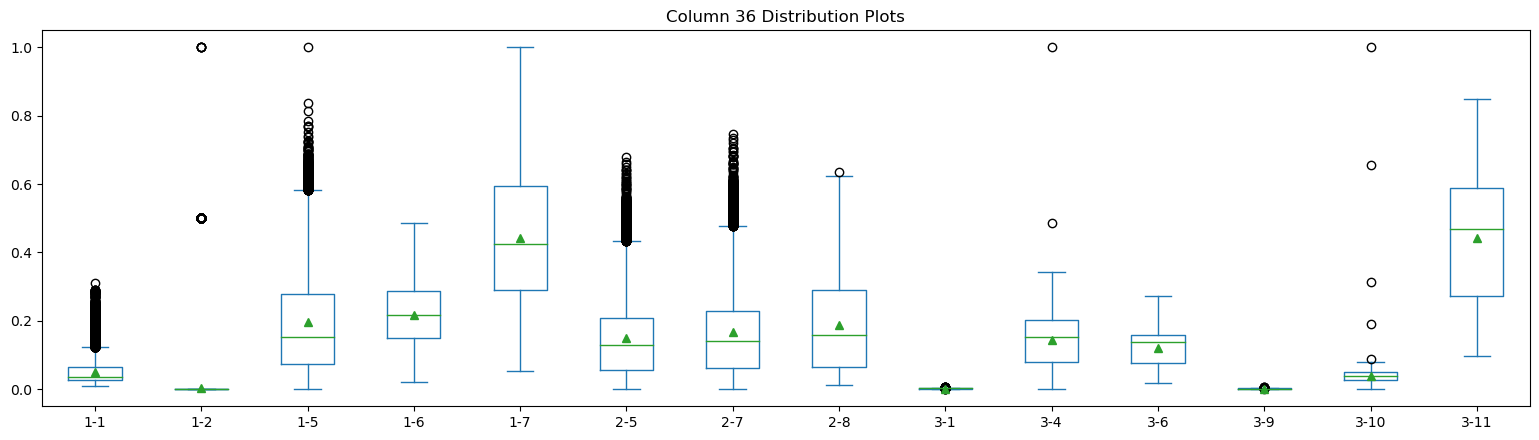

In [5]:
# Machines across columns (Some columns with all zero occurrences in majority of cases are eliminated)
num_cols=38
# fig, axs = plt.subplots(num_cols)

for i in range(num_cols):
    if not (i+1 in [5,8,17,18,27,29,37,38]):
        column_i_df = pd.read_csv('EDA_results/14mach_col_wise_dfs/column'+str(i+1)+'.csv')
        axs[i] = column_i_df[['1-1','1-2','1-5','1-6','1-7','2-5','2-7','2-8','3-1','3-4','3-6','3-9','3-10','3-11']].plot(kind='box', title='Column ' +str(i+1)+ ' Distribution Plots', showmeans=True)


{'8': 0.0, '38': 0.0, '27': 1.1820354246272427e-10, '29': 3.2095387031211234e-10, '17': 6.053475732265718e-09, '18': 1.745830497122602e-07, '10': 1.288111496823233e-06, '13': 0.0007450136105418273, '12': 0.0009772060809808576, '9': 0.0014734712810478418, '33': 0.001817934537481282, '37': 0.002022817754894804, '16': 0.002241438935137166, '15': 0.002886720574251722, '11': 0.004245398489423035, '34': 0.005109717487750278, '2': 0.00527773085872413, '1': 0.0054068789813293975, '3': 0.008395741455851239, '14': 0.010104655473738764, '25': 0.01094057952297627, '32': 0.011764420369120067, '4': 0.01233248832148073, '31': 0.016800603118201453, '28': 0.017157006934026747, '22': 0.017575382853638858, '21': 0.01798737849860952, '35': 0.018142407832063716, '36': 0.019086798624628948, '19': 0.01995040081588115, '20': 0.021933359400730563, '30': 0.02428963511344586, '23': 0.04895631949747442, '6': 0.04966235654627119, '26': 0.07159388393380732, '24': 0.07718137975795365, '7': 0.10350992150044643, '5': 

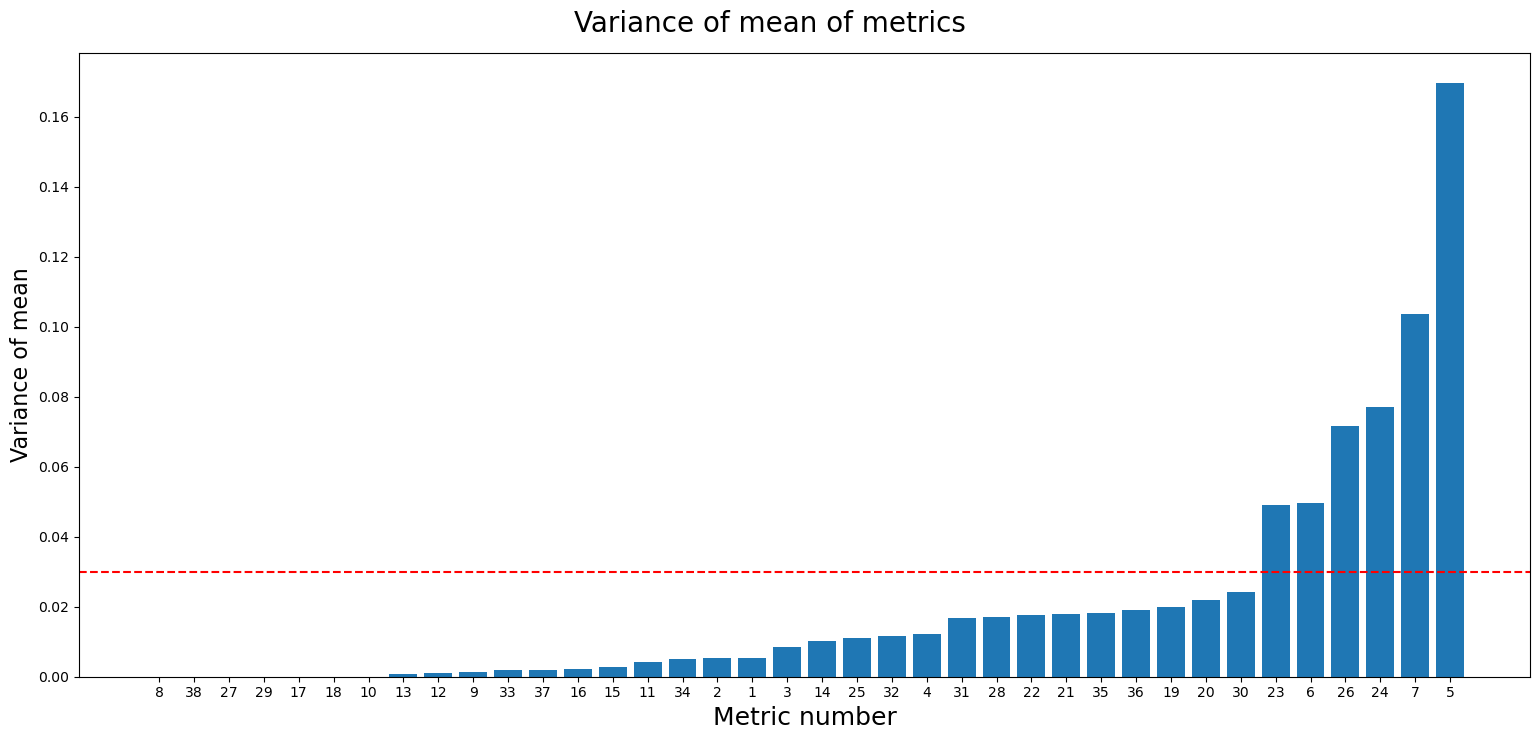

In [9]:
# Machines across columns
num_cols=38
machines_list=['1-1','1-2','1-5','1-6','1-7','2-5','2-7','2-8','3-1','3-4','3-6','3-9','3-10','3-11']
machine_var_dict = {'Column 1':None,'Column 2':None,'Column 3':None,'Column 4':None,'Column 5':None,'Column 6':None,'Column 7':None,'Column 8':None,'Column 9':None,'Column 10':None,'Column 11':None,'Column 12':None,'Column 13':None,'Column 14':None,'Column 15':None,'Column 16':None,'Column 17':None,'Column 18':None,'Column 19':None,'Column 20':None,'Column 21':None,'Column 22':None,'Column 23':None,'Column 24':None,'Column 25':None,'Column 26':None,'Column 27':None,'Column 28':None,'Column 29':None,'Column 30':None,'Column 31':None,'Column 32':None,'Column 33':None,'Column 34':None,'Column 35':None,'Column 36':None,'Column 37':None,'Column 38':None}
for i in range(num_cols):
    column_i_df = pd.read_csv('EDA_results/14mach_col_wise_dfs/column'+str(i+1)+'.csv')
    machine_mean_list = []
    for machine in machines_list:
        # Obtain mean of column
        machine_mean_list.append(column_i_df[machine].mean())
    machine_var_dict['Column '+str(i+1)] = np.var(machine_mean_list)

sorted_machine_var_dict = dict(sorted(machine_var_dict.items(), key=lambda item: item[1]))
sorted_machine_var_dict = {k.strip("Column "):v for k,v in sorted_machine_var_dict.items()}
print(sorted_machine_var_dict)

fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
plt.bar(range(len(sorted_machine_var_dict)), list(sorted_machine_var_dict.values()), align='center')
plt.xticks(range(len(sorted_machine_var_dict)), list(sorted_machine_var_dict.keys()))
fig.suptitle('Variance of mean of metrics', fontsize=20)
plt.xlabel('Metric number', fontsize=18)
plt.ylabel('Variance of mean', fontsize=16)
plt.axhline(y=0.03, color='r', linestyle='--')
plt.show()

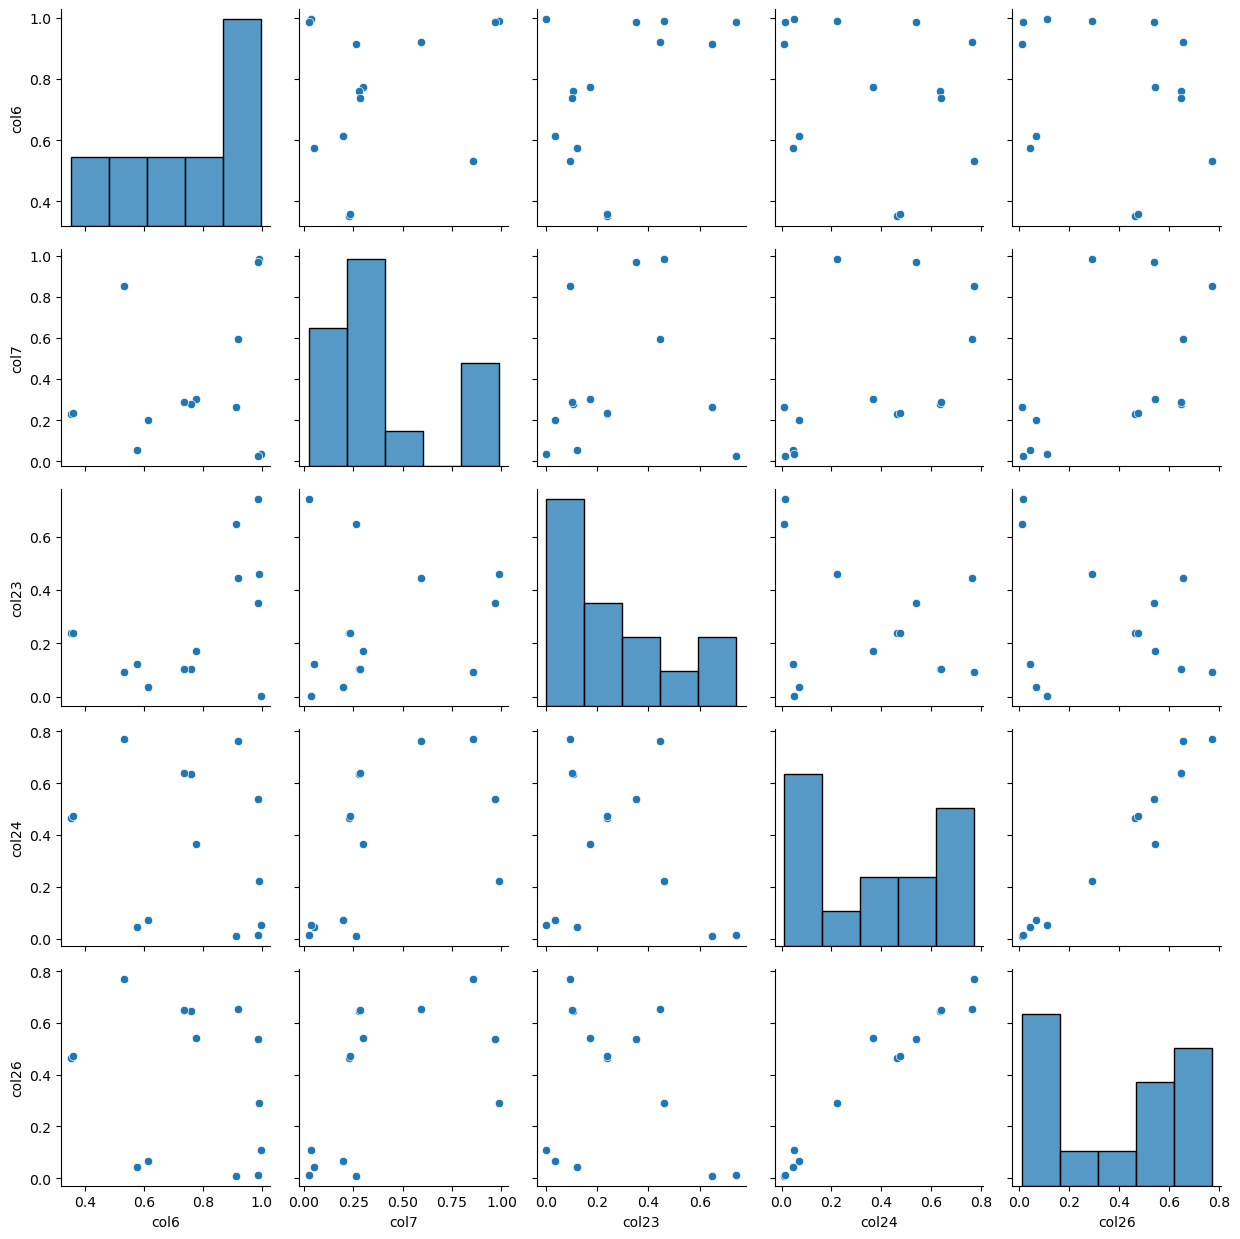

In [10]:
# Rather than visualising pairplots for each machine, try to visualise the pairplots for mean of machines
df = pd.read_csv('EDA_results/5_selected_columns_for_14_machines.csv')
sns.pairplot(df)